In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df_train=pd.read_csv('titanic_train.csv')
df_test= pd.read_csv('titanic_test.csv')

In [4]:
df=df_train.copy()

In [5]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df.duplicated().sum()

0

In [14]:
print('No of columns in test_data')
len(df.columns)

No of columns in test_data


12

In [12]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
df['Name'].dtype

dtype('O')

In [29]:
col=df.columns
for item in col:
    if df[item].dtype == 'O':
        print(item,'is Catagorical Feature')

Name is Catagorical Feature
Sex is Catagorical Feature
Ticket is Catagorical Feature
Cabin is Catagorical Feature
Embarked is Catagorical Feature


In [30]:
col=df.columns
for item in col:
    if df[item].dtype !='O':
        print(item,'is Numerical Feature')

PassengerId is Numerical Feature
Survived is Numerical Feature
Pclass is Numerical Feature
Age is Numerical Feature
SibSp is Numerical Feature
Parch is Numerical Feature
Fare is Numerical Feature


In [33]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dodge, Master. Washington",male,1601,B96 B98,S
freq,1,577,7,4,644


In [34]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### Survived and Pclass relaton

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
df.groupby('Pclass')['Survived'].mean().reset_index()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:xlabel='Pclass'>

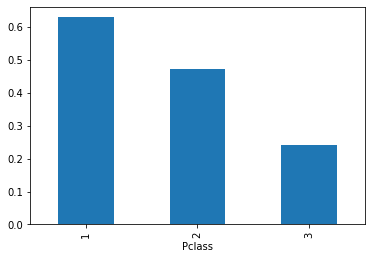

In [42]:
df.groupby('Pclass')['Survived'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

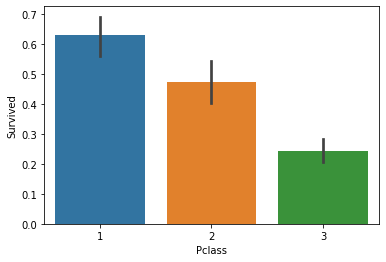

In [48]:
sns.barplot(data=df,x=df['Pclass'],y=df['Survived'])

### Survived and Sex relaton


In [50]:
df.groupby('Sex')['Survived'].mean().reset_index()

,Sex,Survived
0,female,0.742038
1,male,0.188908


<AxesSubplot:xlabel='Sex'>

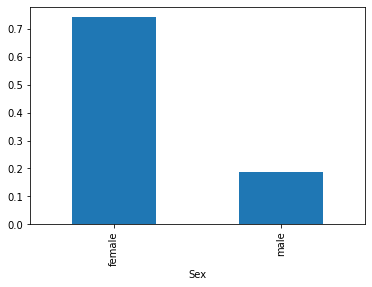

In [51]:
df.groupby('Sex')['Survived'].mean().plot(kind='bar')

### Survived,Sex and Pclass relaton

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

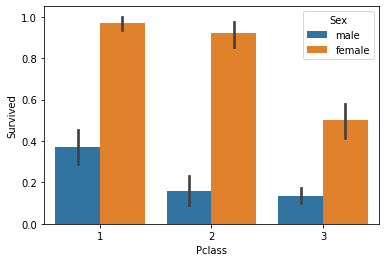

In [52]:
sns.barplot(data=df,x=df['Pclass'],y=df['Survived'],hue='Sex')

### Survived and SibSp relaton

In [58]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

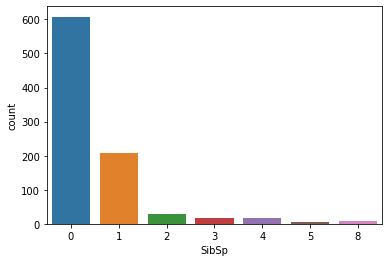

In [61]:
sns.countplot(x=df['SibSp'])

In [62]:
df.groupby('SibSp')['Survived'].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

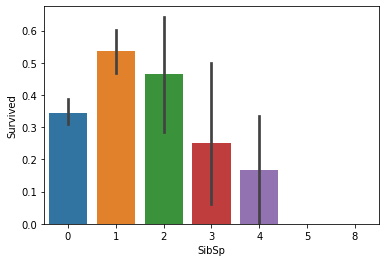

In [64]:
sns.barplot(data=df,x=df['SibSp'],y=df['Survived'])

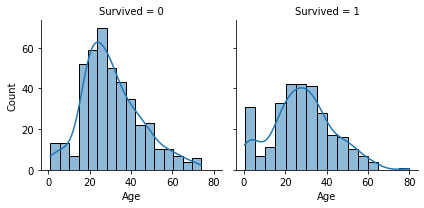

In [75]:
g= sns.FacetGrid(df,col='Survived')
g=g.map(sns.histplot,'Age',kde=True)

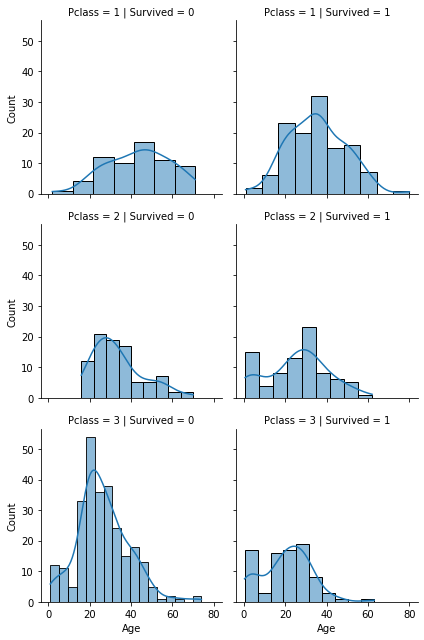

In [76]:
g= sns.FacetGrid(df,col='Survived',row='Pclass')
g=g.map(sns.histplot,'Age',kde=True)

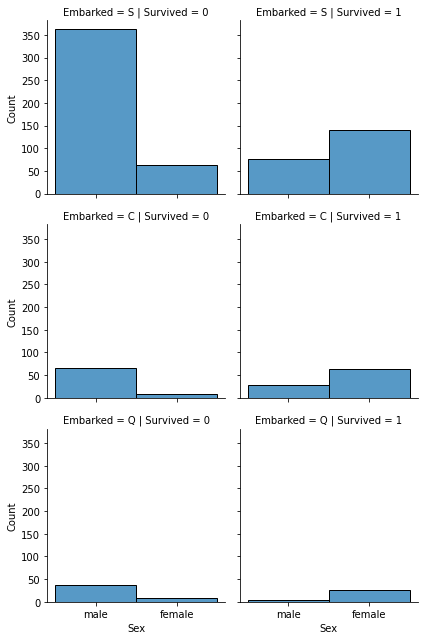

In [78]:
g= sns.FacetGrid(df,col='Survived',row='Embarked')
g=g.map(sns.histplot,'Sex')

In [79]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [128]:
df['Name'].str.split(',').str[1].reset_index()['Name'].str.split('.').str[0].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Mlle              2
 Major             2
 Mme               1
 Sir               1
 the Countess      1
 Lady              1
 Jonkheer          1
 Ms                1
 Capt              1
 Don               1
Name: Name, dtype: int64

In [129]:
df['Title']=df['Name'].str.split(',').str[1].reset_index()['Name'].str.split('.').str[0]

In [131]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs


In [133]:
pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


In [138]:
pd.pivot_table(df, values ='Age', index =['Title'],
                         columns =['Sex'], aggfunc = np.mean)

Sex,female,male
Title,,
Capt,NaN,70.000000
Col,NaN,58.000000
Don,NaN,40.000000
Dr,49.000000,40.600000
Jonkheer,NaN,38.000000
Lady,48.000000,NaN
Major,NaN,48.500000
Master,NaN,4.574167
Miss,21.773973,NaN
